### Business Statistics sub-assignment 1, group 10
Master Digital Driven Business,
Amsterdam University of Applied Sciences - 
November 10, 2023

Otto Tagapere 500930931 - 
Sven Fassaert 500828460 - 
Jelle Schelvis 500803862 - 
Pip Velthuijs 500831930 


Research question: <br>
To what extent do various demographic and lifestyle factors have an influence on healthcare insurance expenses? 

Sub-questions: <br>
To what extent does age influence healthcare insurance expenses? <br>
To what extent does gender influence healthcare insurance expenses?  <br>
To what extent does BMI influence healthcare insurance expenses? <br>
To what extent does smoking influence healthcare insurance expenses? 

In [397]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kruskal
from scipy.stats import f_oneway
from scipy.stats import ttest_ind 
from scipy.stats import mannwhitneyu 

In [398]:
#Importing dataset
Insurance_df = pd.read_csv(r"C:\Users\pipve\OneDrive\Documenten\Master\Business statistics\BS projects\Insurance.csv")
Insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Discriptive analysis (Pip)

In [399]:
# Calculate descriptive statistics
descriptives = Insurance_df.describe()

# Display the results
print("Descriptive Statistics:")
print(descriptives)

Descriptive Statistics:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


Age: The age of individuals in the dataset ranges from 18 to 64 years, with a mean age of approximately 39 years. The majority of individuals fall within the 27 to 51-year range (25th to 75th percentile).

BMI: The BMI values vary from a minimum of 16 to a maximum of 53.1, with a mean BMI of approximately 30.7. The 25th to 75th percentile range spans from 26.3 to 34.7, showing the spread of BMI values.

Children: The number of children per individual varies from 0 to 5, with an average of about 1.095 children per person. The 25th to 75th percentile range indicates that most individuals have either no children or up to 2 children.

Expenses: The expenses in the dataset range from $1,121.87 to $63,770.43, with an average expense of approximately $13,270.42. The 25th to 75th percentile range provides insight into the spread of expenses, with most individuals having expenses between $4,740.29 and $16,639.92.

### Distributions of numeric variables (Jelle)

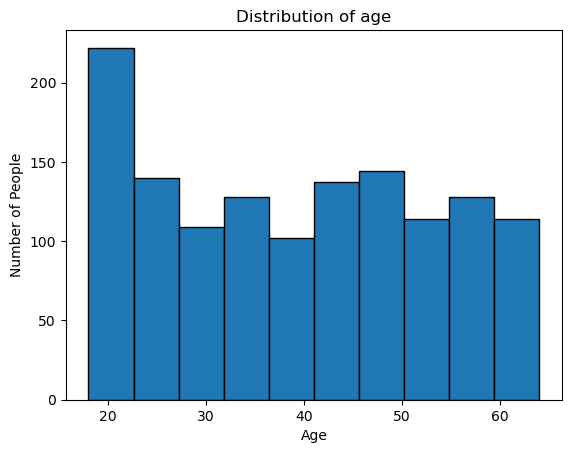

In [400]:
# Choose the number of bins and other properties for the histogram
num_bins = 10  # The number of bins in the histogram

# Create a histogram for the 'bmi' column
plt.hist(Insurance_df['age'], bins=num_bins, edgecolor='k')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Distribution of age')
plt.show()

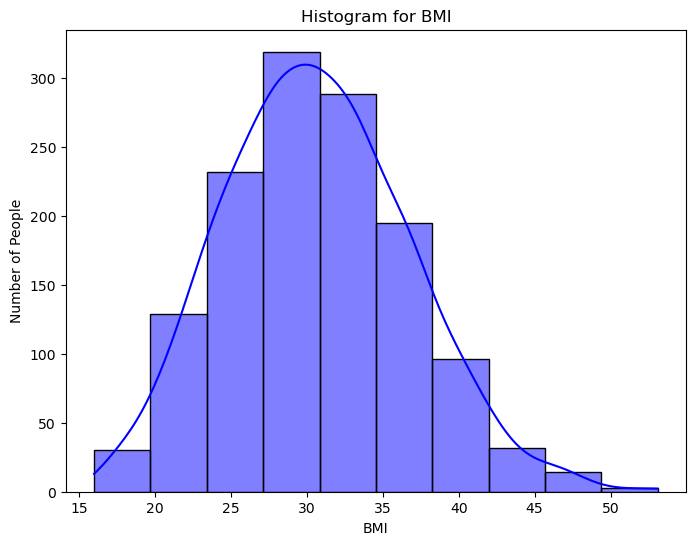

In [401]:
num_bins = 10  
numeric_column = 'bmi'  

# Histogram with KDE-curve
plt.figure(figsize=(8, 6))
sns.histplot(Insurance_df[numeric_column], bins=num_bins, kde=True, color='b', edgecolor='k')

# creating labels 
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.title('Histogram for BMI')

# Show histogram
plt.show()

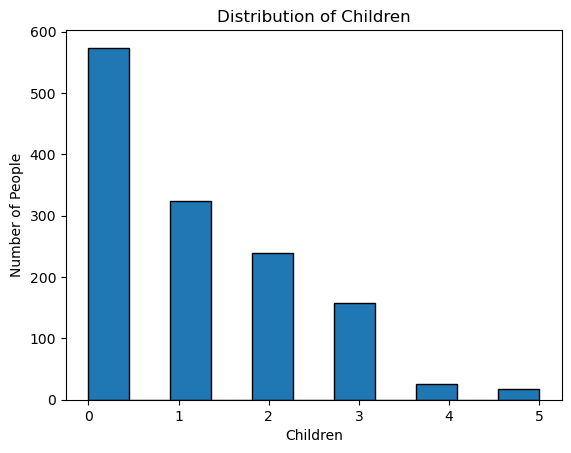

In [402]:
#Histogram for Children
num_bins = 11  # The number of bins in the histogram
plt.hist(Insurance_df['children'], bins=num_bins, edgecolor='k')

# Adding labels and a title
plt.xlabel('Children')
plt.ylabel('Number of People')
plt.title('Distribution of Children')
plt.show()

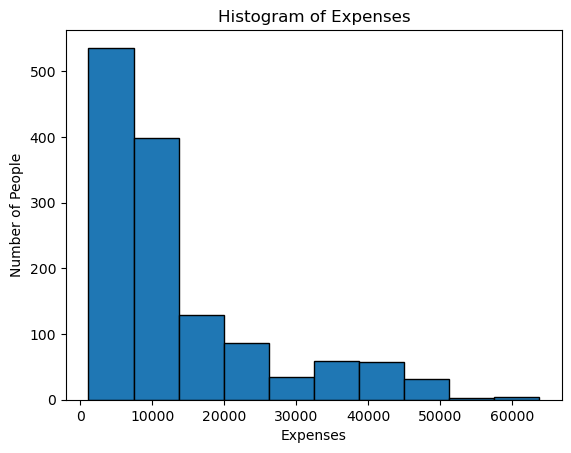

In [403]:
#Histogram for Expenses 
num_bins = 10  #number of bins for the histogram
plt.hist(Insurance_df['expenses'], bins=num_bins, edgecolor='k')

#create labels
plt.xlabel('Expenses')
plt.ylabel('Number of People')
plt.title('Histogram of Expenses')
plt.show()

### Distribution of nominal variables (Jelle)

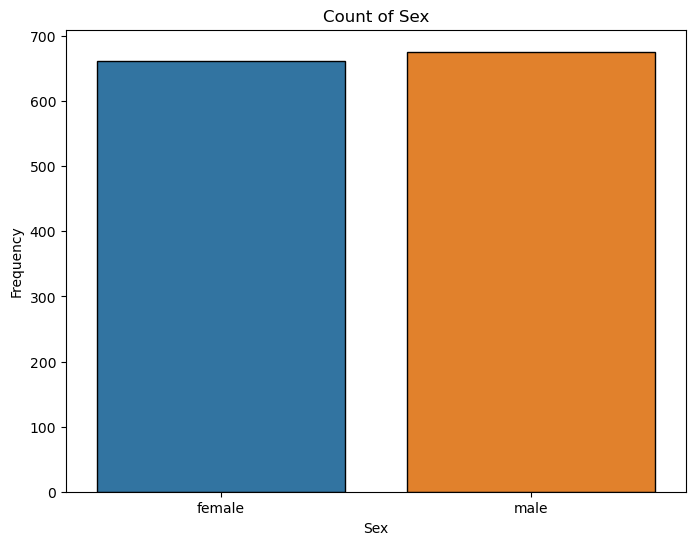

In [404]:
# Distribution of sex
nominal_column = 'sex'
value_counts = Insurance_df[nominal_column].value_counts()

# Creating count plot
plt.figure(figsize=(8, 6))
sns.countplot(x=nominal_column, data=Insurance_df, edgecolor='k')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Count of Sex')

# Showing the plot
plt.show()

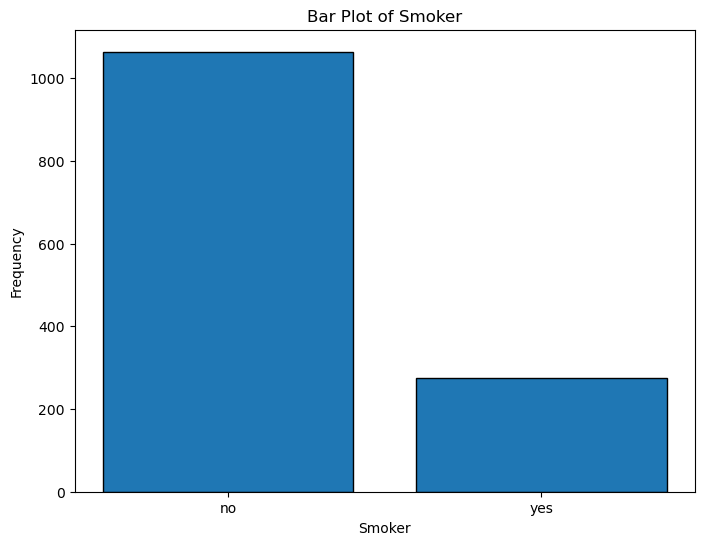

In [405]:
#Frequencies for variable smoker
nominal_column = 'smoker'
value_counts = Insurance_df[nominal_column].value_counts()

# Creating bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts, edgecolor='k')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Bar Plot of Smoker')

# Showing the plot
plt.show()

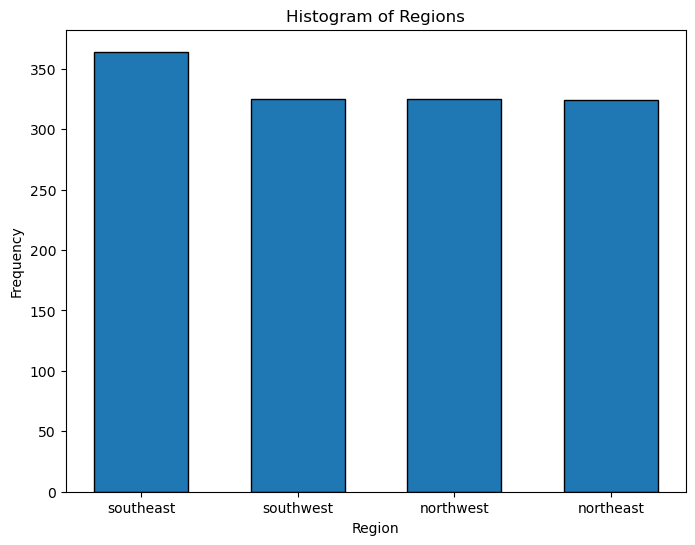

In [406]:
# Frequencies for region
nominal_column = 'region'
value_counts = Insurance_df[nominal_column].value_counts()

# Creating histogram-like bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts, width=0.6, edgecolor='k')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Histogram of Regions')

# Showing the plot
plt.show()


## Bivariate Analysis (Jelle and Pip)

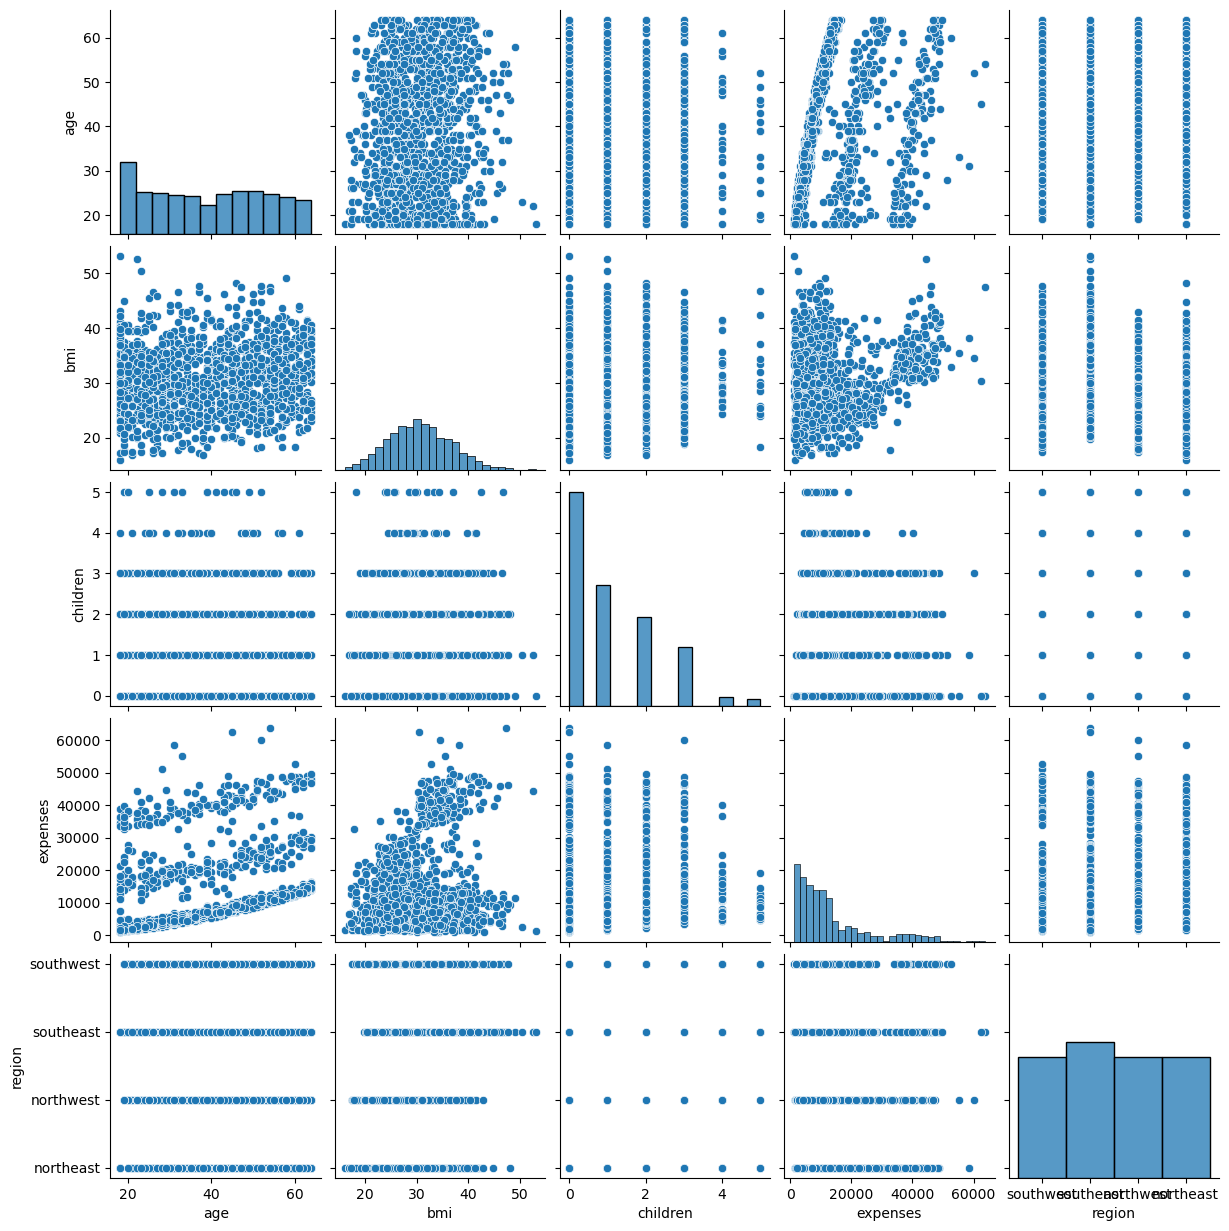

In [407]:
sns.pairplot(data=Insurance_df, vars=['age', 'bmi', 'children', 'expenses','region'])
plt.show()

The pairplot diagram is an overview of plots with different combinations in our data.

#### Age vs Expenses

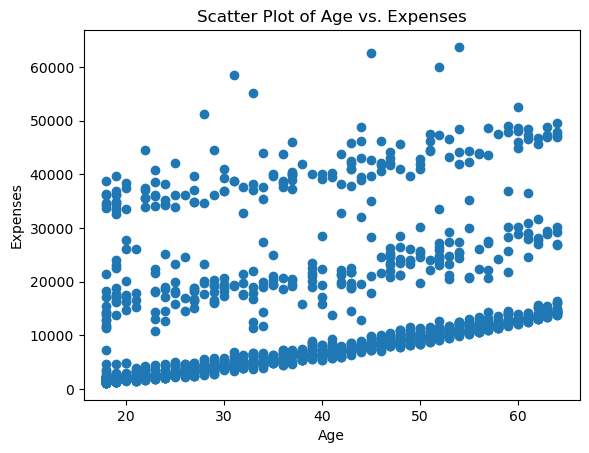

In [408]:
# Scatter plot of 'Age' vs. 'Expenses'
plt.scatter(Insurance_df['age'], Insurance_df['expenses'])
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.title("Scatter Plot of Age vs. Expenses")

# Show the plot
plt.show()

The scatter plot shows a generally positive correlation between age and medical expenses. As age increases, expenses also increases. However, the data points are spread out, which indicates a moderate relationship and/or that other factors might influence expenses as well. To check this, calculating the correlation coefficient is needed. 

H0: There is no positive linear effect between age and expenses, where higher age results in significantly higher expenses.
Ha: There is a positive linear effect between age and expenses, where higher age is associated with significantly higher expenses.

In [409]:
# Perform Pearson correlation test
correlation, p = pearsonr(Insurance_df['age'], Insurance_df['expenses'])

# Display the results
print("Pearson Correlation Coefficient:", correlation)
print("p-value:", p)


if p < 0.05:
    print("We reject H0.")
else:
    print("We fail to reject H0.")

Pearson Correlation Coefficient: 0.2990081922850827
p-value: 4.886695589992816e-29
We reject H0.


In [410]:
# Calculate Spearman correlation coefficient
spearman_corr, p_value = spearmanr(Insurance_df['age'], Insurance_df['expenses'])

# Display the result
print("Spearman Correlation Coefficient:", spearman_corr)
print("P-value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("We reject the null hypothesis.")
    print("There is a statistically significant positive linear effect between age and expenses.")
else:
    print("We fail to reject the null hypothesis.")
    print("There is no statistically significant evidence of a positive linear effect between age and expenses.")


Spearman Correlation Coefficient: 0.5343921337718459
P-value: 1.130692027803638e-99
We reject the null hypothesis.
There is a statistically significant positive linear effect between age and expenses.


#### Sex vs Expenses

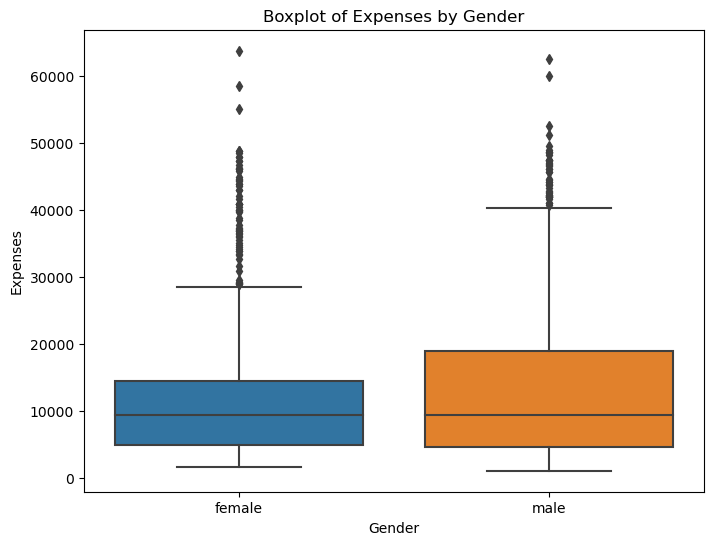

In [411]:
# Creating a boxplot of expenses by sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='expenses', data=Insurance_df)

# Add labels and a title
plt.xlabel('Gender')
plt.ylabel('Expenses')
plt.title('Boxplot of Expenses by Gender')

# Show the boxplot
plt.show()

The plot shows some variation in expenses between male and female, but the data points are scattered without a clear relationship. This suggests that gender alone may not be a strong predictor of expenses. Therefore, further statistical analysis is needed to check if other factors might have an influence as well. 

H0 = There is no significant difference in the distribution of expenses between men and women.
Ha = There is a significant difference in the distribution of expenses between men and women. 

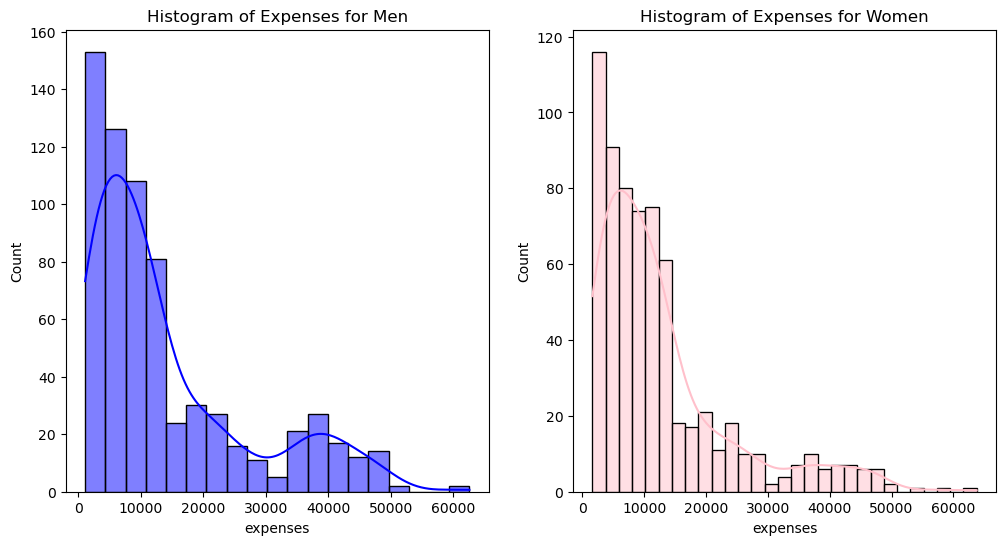

In [412]:
# Visualize the data to check for normality
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(expenses_men, kde=True, color='blue')
plt.title('Histogram of Expenses for Men')

plt.subplot(1, 2, 2)
sns.histplot(expenses_women, kde=True, color='pink')
plt.title('Histogram of Expenses for Women')

plt.show()

First of all it is important to note that the data is not normally distributed. As a result, a MannWhitney U test will be done.

In [413]:
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(expenses_men, expenses_women)

# Display the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value for Mann-Whitney U test:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the distribution of expenses between men and women.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distribution of expenses between men and women.")


Mann-Whitney U test statistic: 226208.0
P-value for Mann-Whitney U test: 0.7286510894470093
Fail to reject the null hypothesis. There is no significant difference in the distribution of expenses between men and women.


#### BMI vs Expenses

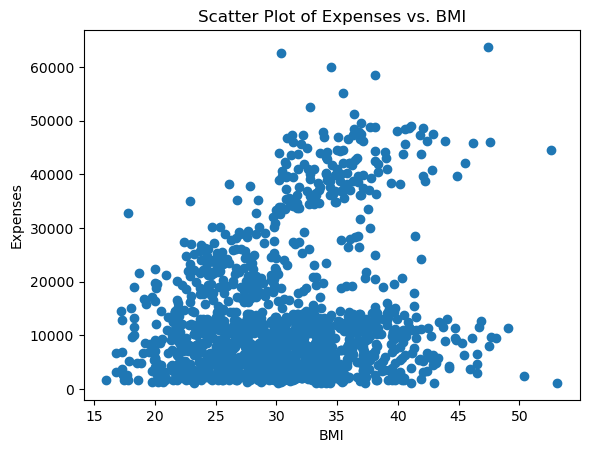

In [414]:
# Scatter plot of 'BMI' vs. 'Expenses'
plt.scatter(Insurance_df['bmi'], Insurance_df['expenses'])
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.title("Scatter Plot of Expenses vs. BMI")
plt.show()

The scatter plot indicates a positive correlation. As BMI increases, medical expenses tend to increase. However, there is a lot of spread of the data points. Therefore, it might not be a strong relationship. The spread, as well as the outliers, could also mean that other factors may affect the expenses. To check the relationship, we perform a statistical analysis. 

H0: There is no significant correlation between BMI and expenses.
Ha: There is a significant correlation between BMI and expenses.

In [415]:
# Calculate the Pearson correlation
pearson_corr, pearson_p_value = pearsonr(Insurance_df['bmi'], Insurance_df['expenses'])
print("Pearson Correlation:", pearson_corr)
print("Pearson p-value:", pearson_p_value)
if pearson_p_value < 0.05:
    print("H0 rejected: There is a significant correlation between BMI and expenses.")
else:
    print("Fail to reject H0: There is no significant correlation between BMI and expenses.")

Pearson Correlation: 0.19857625501893206
Pearson p-value: 2.301828073512984e-13
H0 rejected: There is a significant correlation between BMI and expenses.


In [416]:
# Calculate the Spearman correlation
spearman_corr, spearman_p_value = spearmanr(Insurance_df['bmi'], Insurance_df['expenses'])
print("Spearman Correlation:", spearman_corr)
print("Spearman p-value:", spearman_p_value)
if spearman_p_value < 0.05:
    print("H0 rejected: There is a significant correlation between BMI and expenses.")
else:
    print("Fail to reject H0: There is no significant correlation between BMI and expenses.")

Spearman Correlation: 0.1194188536346528
Spearman p-value: 1.1879756959712592e-05
H0 rejected: There is a significant correlation between BMI and expenses.


#### Number of Children vs Expenses

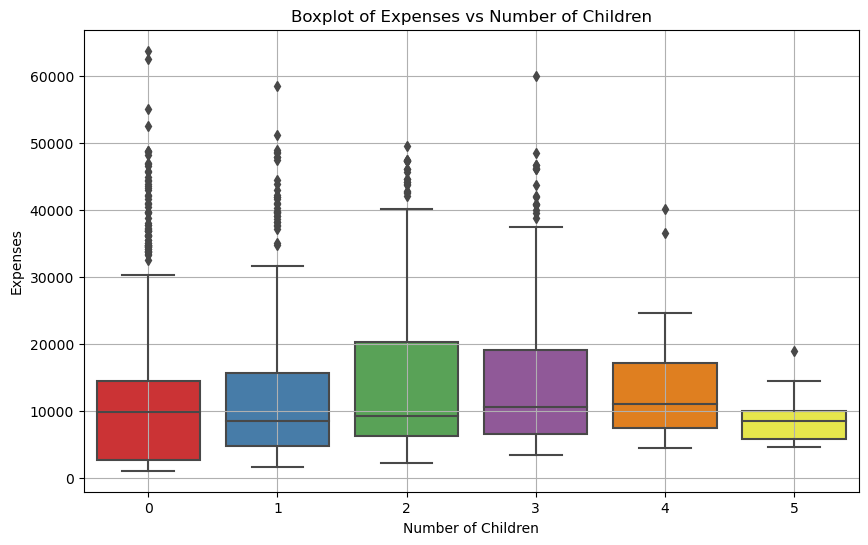

In [417]:
#making boxplot including number of children from 0 to 5
data_to_plot = Insurance_df[Insurance_df['children'].between(0, 5)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, x='children', y='expenses', palette='Set1')

#adding labels, title and showing boxplot
plt.xlabel('Number of Children')
plt.ylabel('Expenses')
plt.title('Boxplot of Expenses vs Number of Children')
plt.grid(True)
plt.show()

The plot shows some variability. As the number of children increases, there is a range of expenses observed. This indicates that the number of children might influences expenses. The data points are dispersed across a range of expenses for each number of children. Therefore, other factors are likely contributing to the variation in expenses observed in the data. Thus, further statistical tests are needed.

H0: There is no effect between the ammount of children and expenses. Ha: There is an effect between age and expenses.

In [418]:
#Doing Kruskal-Wallis test directly on the numeric 'children' variable
kruskal_statistic, p_value = kruskal(*[Insurance_df[Insurance_df['children'] == num]['expenses'] for num in range(6)])

#Show results
print("Kruskal-Wallis Statistic:", kruskal_statistic)
print("p-value:", p_value)

if p< 0.05:
    print("We reject H0.")
else:
    print("We fail to reject H0.")

Kruskal-Wallis Statistic: 29.487065628030848
p-value: 1.8604847983610864e-05
We reject H0.


#### Smoker vs Expenses

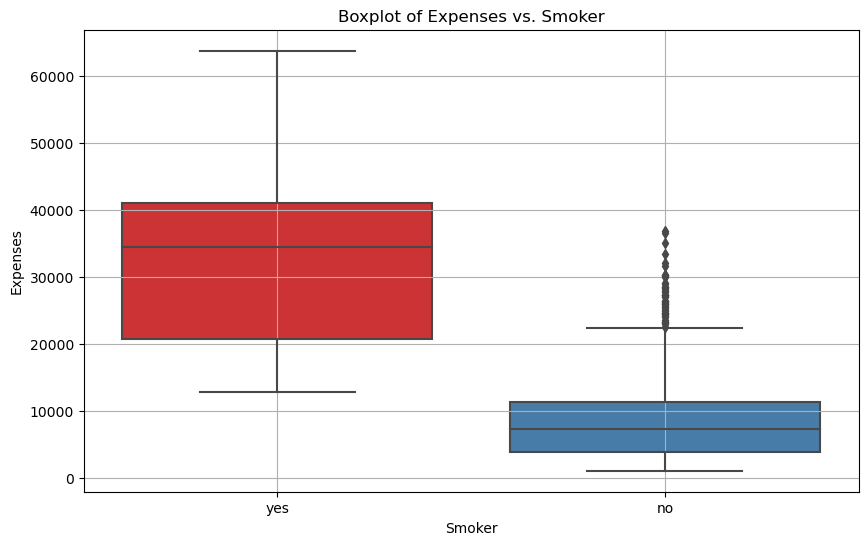

In [419]:
#making plot of smoker vs Expenses
data_to_plot = Insurance_df[['smoker', 'expenses']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, x='smoker', y='expenses', palette='Set1')

#adding labels and title
plt.xlabel('Smoker')
plt.ylabel('Expenses')
plt.title('Boxplot of Expenses vs. Smoker')
plt.grid(True)
plt.show()

This plot shows a difference in expenses between smokers and non-smokers. Smokers tend to have much higher medical expenses compared to non smokers. This is due to the fact that the majority of the data points for smokers are located in the higher range of expenses, while data points for non-smokers are in the lower range of expenses. 

H0: There is no significant difference in mean medical expenses between smokers and non-smokers.
Ha: There is a significant difference in mean medical expenses between smokers and non-smokers.


In [420]:
# spliting data into two groups: smokers and non-smokers
expenses_smokers = Insurance_df[Insurance_df['smoker'] == 'yes']['expenses']
expenses_non_smokers = Insurance_df[Insurance_df['smoker'] == 'no']['expenses']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(expenses_smokers, expenses_non_smokers)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

T-statistic: 46.6649210792002
P-value: 8.271449574495316e-283
We reject the null hypothesis.


#### Region vs Expenses

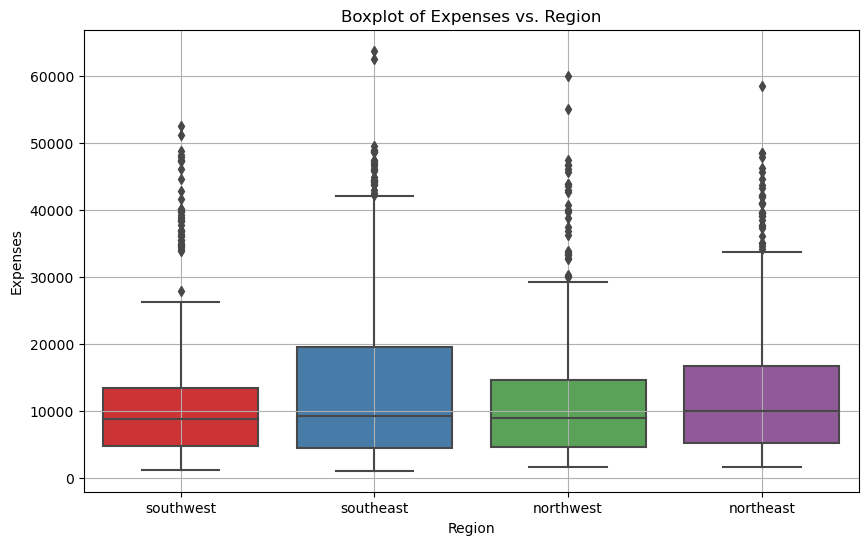

In [421]:
#Scatter plot of Region vs Expenses
data_to_plot = Insurance_df[['region', 'expenses']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, x='region', y='expenses', palette='Set1')

#adding labels and title 
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.title('Boxplot of Expenses vs. Region')

#Showing boxplot
plt.grid(True)
plt.show()

The plot shows there is some variation between the regions, since the data points are distributed different across the different levels of expenses. However, further statistical analysis is needed to quantify the extent to which region and/or other factors influence the expenses.

H0: There is no significant difference in the mean expenses among the various regions. 
Ha: There is a significant difference in the mean expenses among the various regions. At least one region has a significantly different mean expenses compared to the others.

In [422]:
#Split the data into groups based on region
expenses_southwest = Insurance_df[Insurance_df['region'] == 'southwest']['expenses']
expenses_southeast = Insurance_df[Insurance_df['region'] == 'southeast']['expenses']
expenses_northwest = Insurance_df[Insurance_df['region'] == 'northwest']['expenses']
expenses_northeast = Insurance_df[Insurance_df['region'] == 'northeast']['expenses']

#doing one-way ANOVA
f_statistic, p_value = f_oneway(expenses_southwest, expenses_southeast, expenses_northwest, expenses_northeast)

#show results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p< 0.05:
    print("We reject H0.")
else:
    print("We fail to reject H0.")

F-statistic: 2.9696265038563223
p-value: 0.030893363993447484
We reject H0.


In [423]:
#String variables to numeric
Insurance_df['sex'] = Insurance_df['sex'].replace({"male": 0, "female": 1})
Insurance_df['smoker'] = Insurance_df['smoker'].replace({"no": 0, "yes": 1})
Insurance_df['region'] = Insurance_df['region'].replace({"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3})
Insurance_df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


### Testing for multicollinearity (Otto and Pip)

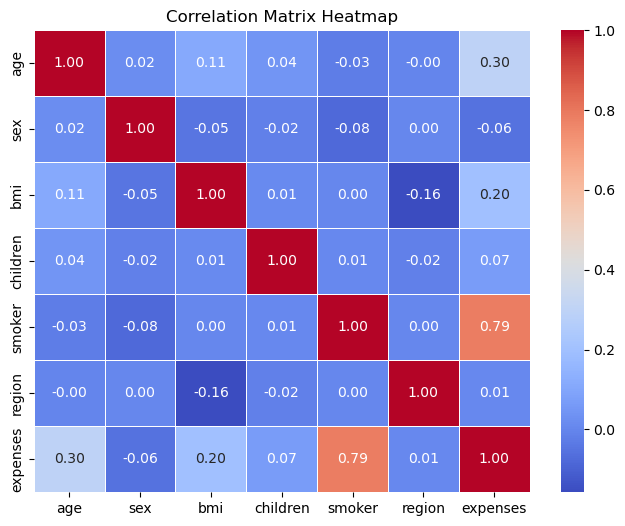

In [424]:
# Calculate the correlation matrix
correlation_matrix = Insurance_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The matrix shows that only smoker has a strong correlation with expenses. As a result, people who do smoke have higher expenses. However, since the outcome is higher than 0.7, multicollinearity can complicate the interpretation of the regression model and make it challenging to discern the unique contribution of each variable. 

### Multiple regression (Otto and Sven)

H0 = there is no significant relationship between insurance expenses and the independent variables.

Ha = there is a significant relationship between insurance expenses and the independent variables.

In [425]:
age = Insurance_df.age.to_list()       # Moved column from a df to a list
sex = Insurance_df.sex.to_list() # Moved column from a df to a list
bmi = Insurance_df.bmi.to_list()       # Moved column from a df to a list
children = Insurance_df.children.to_list() # Moved column from a df to a list
smoker = Insurance_df.smoker.to_list()       # Moved column from a df to a list
region = Insurance_df.region.to_list() # Moved column from a df to a list
expenses = Insurance_df.expenses.to_list()       # Moved column from a df to a list

In [426]:
#Putting independent variables in an array before Linear Regression
X =  []
for i in range(len(age)):
    X.append([age[i], sex[i], bmi[i], children[i], smoker[i], region[i]])
print(X)
X_data = np.array(X)
print(X_data)

[[19, 1, 27.9, 0, 1, 0], [18, 0, 33.8, 1, 0, 1], [28, 0, 33.0, 3, 0, 1], [33, 0, 22.7, 0, 0, 2], [32, 0, 28.9, 0, 0, 2], [31, 1, 25.7, 0, 0, 1], [46, 1, 33.4, 1, 0, 1], [37, 1, 27.7, 3, 0, 2], [37, 0, 29.8, 2, 0, 3], [60, 1, 25.8, 0, 0, 2], [25, 0, 26.2, 0, 0, 3], [62, 1, 26.3, 0, 1, 1], [23, 0, 34.4, 0, 0, 0], [56, 1, 39.8, 0, 0, 1], [27, 0, 42.1, 0, 1, 1], [19, 0, 24.6, 1, 0, 0], [52, 1, 30.8, 1, 0, 3], [23, 0, 23.8, 0, 0, 3], [56, 0, 40.3, 0, 0, 0], [30, 0, 35.3, 0, 1, 0], [60, 1, 36.0, 0, 0, 3], [30, 1, 32.4, 1, 0, 0], [18, 0, 34.1, 0, 0, 1], [34, 1, 31.9, 1, 1, 3], [37, 0, 28.0, 2, 0, 2], [59, 1, 27.7, 3, 0, 1], [63, 1, 23.1, 0, 0, 3], [55, 1, 32.8, 2, 0, 2], [23, 0, 17.4, 1, 0, 2], [31, 0, 36.3, 2, 1, 0], [22, 0, 35.6, 0, 1, 0], [18, 1, 26.3, 0, 0, 3], [19, 1, 28.6, 5, 0, 0], [63, 0, 28.3, 0, 0, 2], [28, 0, 36.4, 1, 1, 0], [19, 0, 20.4, 0, 0, 2], [62, 1, 33.0, 3, 0, 2], [26, 0, 20.8, 0, 0, 0], [35, 0, 36.7, 1, 1, 3], [60, 0, 39.9, 0, 1, 0], [24, 1, 26.6, 0, 0, 3], [31, 1, 36.6, 2

In [427]:
#Calculating b0, b1, b2, b3, b4, b5, b6 and r-square
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_data, expenses)
b0 = model.intercept_
b12 = model.coef_
print("b0 = ", b0)
print("b1, b2, b3, b4, b5, b6 = ", b12)
r_sq = model.score(X_data, expenses)
print("Coefficent of Determination = ",r_sq)

b0 =  -13009.625272570484
b1, b2, b3, b4, b5, b6 =  [  257.27248218   131.14574742   332.6448185    479.56455958
 23819.32186917   353.48536976]
Coefficent of Determination =  0.7507516902763371


Intercept b0 = -13009.625272570484 means when all independent variables are 0, the predicted values of the dependent variable is -13009.625272570484. In the model, the Coefficent of Determination =  0.7507516902763371 shows that approximately 75.1% of the variance in the dependent variable is explained by the independent variables. 

In [428]:
#Calculating predictor for expenses (y predictor)
y_pred = []
for i in range(len(age)):
    temp = b0 + b12[0]*age[i] + b12[1]*sex[i] + b12[2]*bmi[i] + b12[3]*children[i] + b12[4]*smoker[i] + b12[5]*region[i]
    y_pred.append(temp)
print (y_pred)

[25109.80994163799, 3697.724201382708, 6963.462287497305, 3738.374758801614, 5543.50015135298, 3999.4246276247063, 10899.441522327072, 8000.528206185294, 8441.857387803424, 11847.076462335453, 3197.9371359175693, 35993.78033535441, 4350.623574027629, 15121.528622935293, 32113.885844146283, 541.1789835600723, 12285.170626787376, 1885.0446071551216, 14803.219915009618, 30270.233155086098, 15593.538980838435, 6096.951619249578, 3317.9530873546687, 31839.497117148236, 7489.611344737437, 13307.037444297905, 12074.23826865944, 13848.356900145303, -117.8030414517624, 31819.279574925164, 28311.8467432299, 1561.4399899562516, 3921.162243314953, 13319.360207704463, 30601.162050668423, -628.5230742216701, 16195.357798657125, 598.4714888955514, 33562.318980725504, 39518.57378548454, 3204.8683285632114, 8584.382268481435, 5623.253469376469, 8198.677214211528, 10647.872485482152, 13548.012977320466, 6645.364858569586, 6608.160399245024, 11061.152828521668, 32613.653495628714, 4655.03680204721, 5367.

The code uses the coefficients and values of the independent variables to calculate the predicted values for the dependent variable. The predicted value for each observation is obtained by applying the coefficients to the corresponding values of age, sex, bmi, children, smoker, and region.

In [429]:
#Calculating MSE based on 1332 Degrees of Freedom (n-p-1)
SSE = 0
for i in range(len(expenses)):
    SSE = SSE + (expenses[i]-y_pred[i])*(expenses[i]-y_pred[i])
MSE = SSE/1332
print (MSE)

36690066.31427378


The variable SSE is initialized to 0 and then accumulates the squared differences between the actual expenses (expenses[i]) and the predicted expenses (y_pred[i]) for each observation. The number 1332 is the degrees of freedom for the MSE, whihch is calculated as sample size minus number of independent variables minus 1 (n-p-1).
 

In [430]:
#Calculating MSR based on 6 degrees of freedom (since there are 6 betas)
SSR = 0
y_avg = np.mean(expenses)
print (y_avg)
for i in y_pred:
    SSR = SSR + ((i-y_avg)*(i-y_avg))
MSR = SSR/6
print ("MSR = ", MSR)

13270.422414050823
MSR =  24533842222.550766


After calculating the sum of squared residuals (SSR), the code divides it by the degrees of freedom (6) to obtain the Mean Squared Residuals (MSR). MSR is a measure of the average squared deviation of the predicted values from the mean of the observed values.

In [431]:
F = MSR/MSE
print(F)

668.6780561365789


Our F = 668.6780561365789, given that F = MSR/MSE. With 1332  degrees of freedom in the numerator and 6 degrees of freedom in the denominator, F(.05) = 3.67. With 668.68 > 3.67, we reject the null hypothesis and conclude that a significant relationship is present between insurance expenses and the independent variables.